# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sinasc = pd.read_csv('G:\Downloads\sinasc_RO_2019.csv')

In [19]:
# Printar valores únicos
print(sinasc['APGAR5'].unique())
print(sinasc['SEXO'].unique())
print(sinasc['GESTACAO'].unique())

[10.  9.  7.  0.  8.  4.  3.  6.  5. nan  2.  1.]
['Masculino' 'Feminino' nan]
['37 a 41 semanas' '42 semanas e mais' '32 a 36 semanas' '22 a 27 semanas'
 '28 a 31 semanas' nan 'Menos de 22 semanas']


In [21]:
# Contar valores nulos por coluna
print(sinasc[['APGAR5', 'SEXO', 'GESTACAO']].isnull().sum())

APGAR5       103
SEXO           4
GESTACAO    1232
dtype: int64


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [23]:
# Defininco 1 para sexo masculino e 2 para feminino
sinasc['SEXO'] = sinasc['SEXO'].map({'Masculino': 1, 'Feminino': 2})

# Categorizando
def var_APGAR5(apgar5):
    if 0 <= apgar5 <= 3:
        return 'asfixia grave'
    elif 4 <= apgar5 <= 5:
        return 'asfixia moderada'
    elif 6 <= apgar5 <= 7:
        return 'asfixia leve'
    elif 8 <= apgar5 <= 10:
        return 'normal'
    else:
        return 'inválido'

sinasc['APGAR5_CATEGORIA'] = sinasc['APGAR5'].apply(var_APGAR5)

In [25]:
# Verificar os valores únicos após categorização

print(sinasc['APGAR5_CATEGORIA'].unique())
print(sinasc['SEXO'].unique())
print(sinasc['GESTACAO'].unique())

['normal' 'asfixia leve' 'asfixia grave' 'asfixia moderada' 'inválido']
[ 1.  2. nan]
['37 a 41 semanas' '42 semanas e mais' '32 a 36 semanas' '22 a 27 semanas'
 '28 a 31 semanas' nan 'Menos de 22 semanas']


In [27]:
# Verificar valores nulos
print(sinasc[['APGAR5_CATEGORIA', 'SEXO', 'GESTACAO']].isnull().sum())

# Filtrar dados para remover valores nulos
filtered_data = sinasc.dropna(subset=['APGAR5_CATEGORIA', 'SEXO', 'GESTACAO'])

# Verificar valores únicos após a filtragem
print(filtered_data['APGAR5_CATEGORIA'].unique())
print(filtered_data['SEXO'].unique())
print(filtered_data['GESTACAO'].unique())

print(filtered_data.head())

APGAR5_CATEGORIA       0
SEXO                   4
GESTACAO            1232
dtype: int64
['normal' 'asfixia leve' 'asfixia grave' 'asfixia moderada' 'inválido']
[1. 2.]
['37 a 41 semanas' '42 semanas e mais' '32 a 36 semanas' '22 a 27 semanas'
 '28 a 31 semanas' 'Menos de 22 semanas']
   ORIGEM   CODESTAB  CODMUNNASC  LOCNASC  IDADEMAE  ESTCIVMAE  \
0       1  2679477.0      110001        1        19        5.0   
1       1  2679477.0      110001        1        29        2.0   
2       1  2679477.0      110001        1        37        9.0   
3       1  2516500.0      110001        1        30        5.0   
4       1  2516500.0      110001        1        30        2.0   

            ESCMAE  CODOCUPMAE  QTDFILVIVO  QTDFILMORT  ...  CONTADOR  \
0      8 a 11 anos         NaN         0.0         0.0  ...         1   
1      8 a 11 anos    999992.0         1.0         0.0  ...         2   
2      8 a 11 anos    513205.0         2.0         0.0  ...         3   
3  12 anos ou mais    2312

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

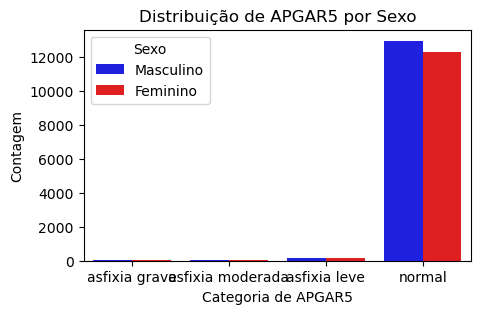

In [47]:
# Filtrar dados válidos de APGAR5 e SEXO
filtered_data = sinasc[(sinasc['APGAR5_CATEGORIA'] != 'inválido') & (sinasc['SEXO'].notna()) & (sinasc['GESTACAO'].notna())].copy()

# Mapear os valores numéricos de Sexo para os rótulos 'Masculino' e 'Feminino'
sexo_transf = {1: 'Masculino', 2: 'Feminino'}
filtered_data.loc[:, 'SEXO_LABEL'] = filtered_data['SEXO'].map(sexo_transf)

# Criar o gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de GESTACAO
plt.figure(figsize=(5, 3))
sns.countplot(data=filtered_data, x='APGAR5_CATEGORIA', hue='SEXO_LABEL', palette={'Masculino': 'blue', 'Feminino': 'red'}, order=['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal'])
plt.title('Distribuição de APGAR5 por Sexo')
plt.xlabel('Categoria de APGAR5')
plt.ylabel('Contagem')
plt.legend(title='Sexo')
plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [51]:
crosstab_apgar5_gestacao = pd.crosstab(filtered_data['GESTACAO'], filtered_data['APGAR5_CATEGORIA'])
print(crosstab_apgar5_gestacao)

APGAR5_CATEGORIA     asfixia grave  asfixia leve  asfixia moderada  normal
GESTACAO                                                                  
22 a 27 semanas                 21            12                 1      51
28 a 31 semanas                  3            18                12     129
32 a 36 semanas                  7            73                19    2134
37 a 41 semanas                 33           195                28   22264
42 semanas e mais                1             6                 1     690
Menos de 22 semanas              2             1                 0       4


####  5) Da tabela cruzada do item anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [53]:
crosstab_apgar5_gestacao_percent = crosstab_apgar5_gestacao.div(crosstab_apgar5_gestacao.sum(axis=1), axis=0)
print(crosstab_apgar5_gestacao_percent)

APGAR5_CATEGORIA     asfixia grave  asfixia leve  asfixia moderada    normal
GESTACAO                                                                    
22 a 27 semanas           0.247059      0.141176          0.011765  0.600000
28 a 31 semanas           0.018519      0.111111          0.074074  0.796296
32 a 36 semanas           0.003135      0.032691          0.008509  0.955665
37 a 41 semanas           0.001465      0.008659          0.001243  0.988632
42 semanas e mais         0.001433      0.008596          0.001433  0.988539
Menos de 22 semanas       0.285714      0.142857          0.000000  0.571429


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

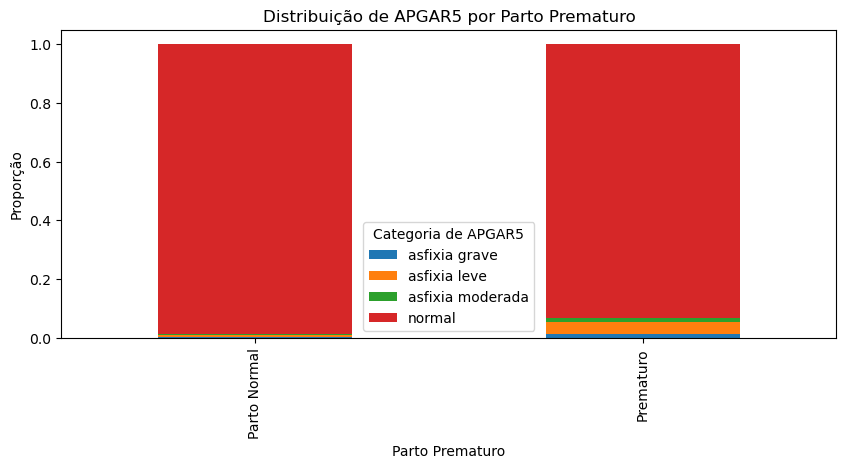

In [81]:
# Filtrar dados válidos para Apgar5_categoria e Sexo
filtered_data = sinasc[(sinasc['APGAR5_CATEGORIA'] != 'inválido') & (sinasc['SEXO'].notna()) & (sinasc['GESTACAO'].notna())].copy()

# Mapear os valores numéricos de Sexo para os rótulos 'Masculino' e 'Feminino'
sexo_map = {1: 'Masculino', 2: 'Feminino'}
filtered_data.loc[:, 'SEXO_LABEL'] = filtered_data['SEXO'].map(sexo_map)

# Converter Gestaçaõ para o valor mínimo da faixa de semanas
def convert_gestacao(gestacao):
    try:
        return int(gestacao.split()[0])
    except ValueError:
        return None

filtered_data.loc[:, 'GESTACAO'] = filtered_data['GESTACAO'].apply(convert_gestacao)

# Remover valores inválidos após a conversão
filtered_data = filtered_data[filtered_data['GESTACAO'].notna()]

# Categorizar gestação como prematuro ou parto normal
filtered_data.loc[:, 'PARTO_PREMATURO'] = filtered_data['GESTACAO'].apply(lambda x: 'Prematuro' if x < 37 else 'Parto Normal')

# Tabela cruzada para parto prematuro e APGAR5
crosstab_prematuro_apgar5 = pd.crosstab(filtered_data['PARTO_PREMATURO'], filtered_data['APGAR5_CATEGORIA'], normalize='index')

# Gráfico de barras da tabela cruzada
crosstab_prematuro_apgar5.plot(kind='bar', stacked=True, figsize=(10, 4))
plt.title('Distribuição de APGAR5 por Parto Prematuro')
plt.xlabel('Parto Prematuro')
plt.ylabel('Proporção')
plt.legend(title='Categoria de APGAR5')
plt.show()

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

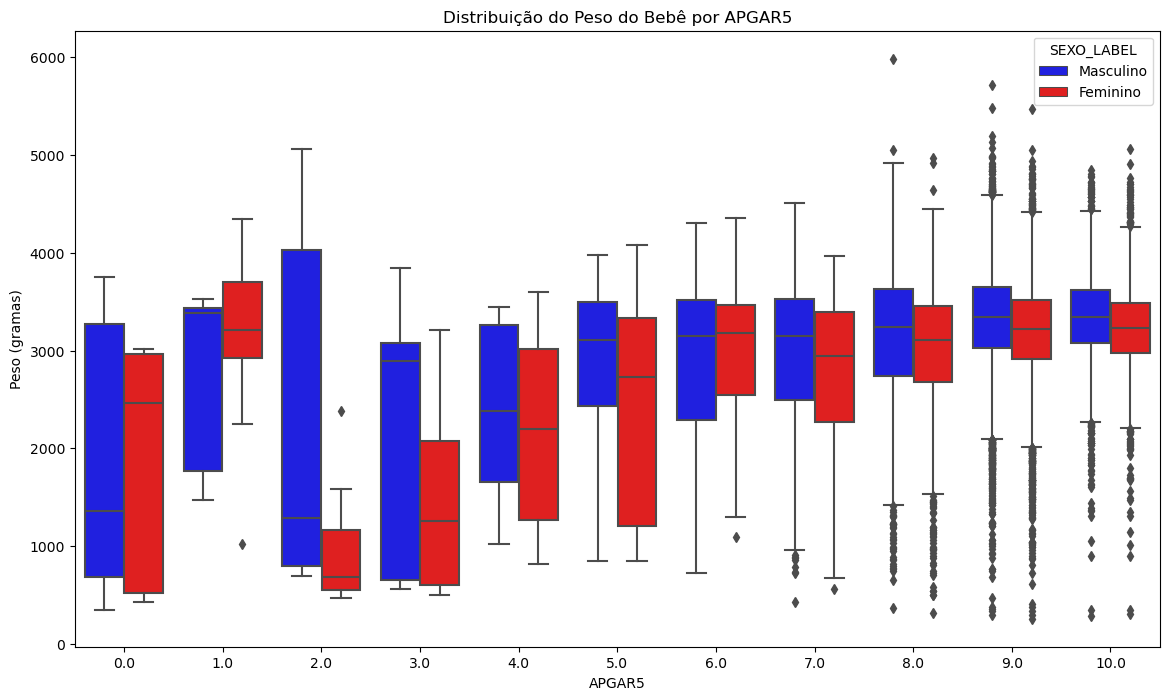

In [92]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=filtered_data, x='APGAR5', y='PESO', hue='SEXO_LABEL', palette={'Masculino': 'blue', 'Feminino': 'red'})
plt.title('Distribuição do Peso do Bebê por APGAR5')
plt.xlabel('APGAR5')
plt.ylabel('Peso (gramas)')
plt.show()

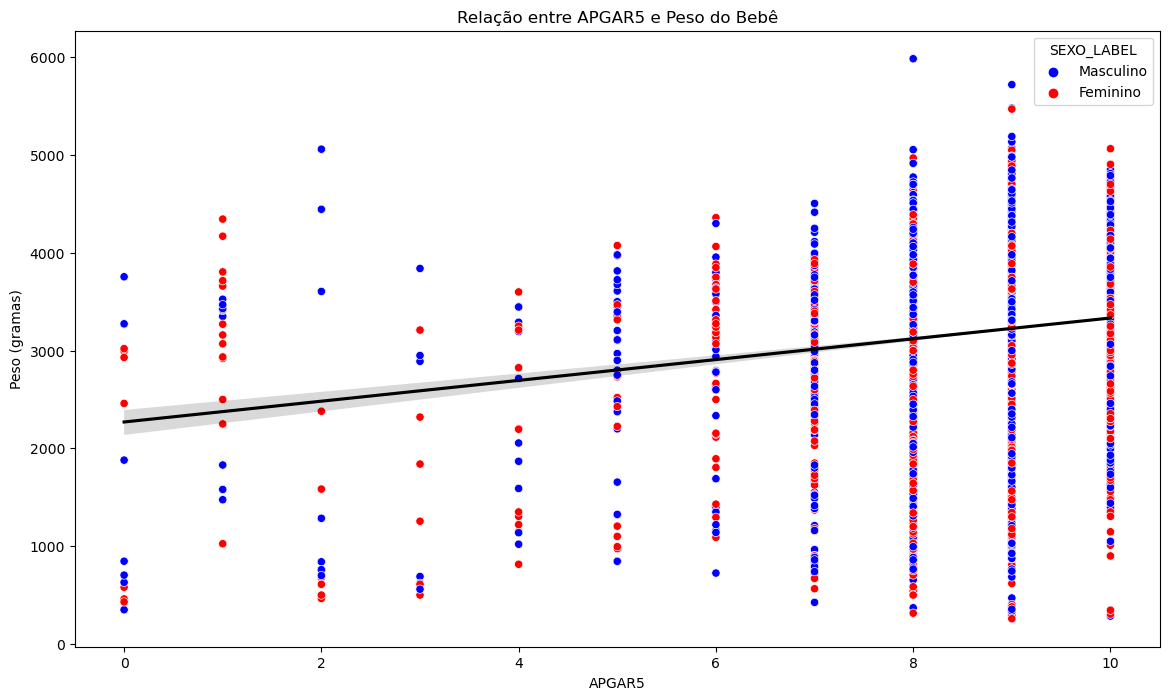

In [87]:
# Gráfico de dispersão com regressão
plt.figure(figsize=(14, 8))
sns.scatterplot(data=filtered_data, x='APGAR5', y='PESO', hue='SEXO_LABEL', palette={'Masculino': 'blue', 'Feminino': 'red'})
sns.regplot(data=filtered_data, x='APGAR5', y='PESO', scatter=False, color='black')
plt.title('Relação entre APGAR5 e Peso do Bebê')
plt.xlabel('APGAR5')
plt.ylabel('Peso (gramas)')
plt.show()

O gráfico de regrassão com dispersão nos mostra a tendência entre as variáveis APGAR5 e o Peso do Bebê. Com isso podemos tentar visualizar um padrão entre ambas as variáveis, que no caso, temos maiores incidência de APGAR5 em bebês com menos de 1000g e entre 3000 e 3800g, aproximadamente. Esse gráfico complementa o gráfico anterior (boxplot), nos formecendo uma maior assertividade no mapeamento  das variáveis analisadas.